In [1]:
# 用KNN模型实现二分类预测
import numpy as np 
import pandas as pd 
from sklearn.preprocessing  import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm , metrics
from sklearn.neighbors import KNeighborsClassifier
import pickle

from sklearn.linear_model import LogisticRegression

In [2]:
creditCard_data = pd.read_csv("creditcard_2023.csv")
print("shape of the data: ",creditCard_data.shape)

shape of the data:  (568630, 31)


In [4]:
creditCard_data.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [5]:
# 1.Preprocessing the data

## 1.1 checking for null values if any  检查是否有空值
print(creditCard_data.isna().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
## 1.2 checking for duplicates if any   检查是否有重复值
print("重复值的数量：",creditCard_data.duplicated().sum())

重复值的数量： 0


In [7]:
## 1.3 extract the features and the label  
y = creditCard_data.iloc[:,-1]
x = creditCard_data.iloc[:,1:30]
print("x shape:" , x.shape)
print("y shape: ",y.shape)

x shape: (568630, 29)
y shape:  (568630,)


In [8]:
## 1.4 normalize the data 
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)
x_normalized[0]

array([0.56509083, 0.91106842, 0.32814324, 0.59703704, 0.19142831,
       0.46201845, 0.02191858, 0.63576003, 0.18645748, 0.10895522,
       0.58662371, 0.11607518, 0.38149206, 0.12485038, 0.30807256,
       0.04972865, 0.31619636, 0.29933661, 0.68140328, 0.72429707,
       0.70157444, 0.39044943, 0.48643805, 0.24856315, 0.48660636,
       0.56259943, 0.08419483, 0.33436928, 0.74748436])

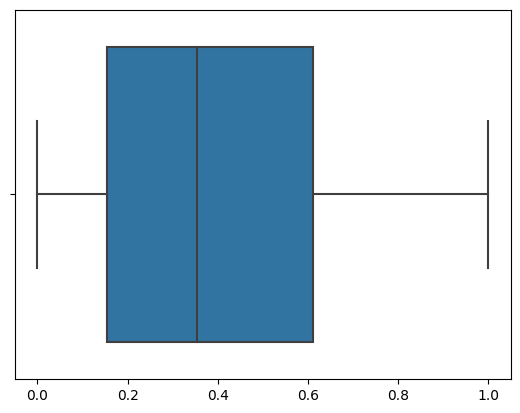

In [12]:
# 1.5 check for outliers if any   检查是否有异常值
sns.boxplot(x = x_normalized)
plt.show()

In [6]:
## 1.6 reduce the dimension of the data    使用主成分分析法降维
pca = PCA()
pca.fit_transform(x_normalized)
cum_var = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cum_var >= 0.95)+1
print("number of components needed to retain 95% of the data: ",num_components)
pca2 = PCA(n_components= num_components)
x_reduced = pca2.fit_transform(x_normalized)
print('x shape after reduction: ', x_reduced.shape)
cum_var

number of components needed to retain 95% of the data:  11
x shape after reduction:  (568630, 11)


array([0.3930391 , 0.6985914 , 0.76273027, 0.81567022, 0.84436258,
       0.86883517, 0.89078754, 0.90970961, 0.92632565, 0.94153327,
       0.95430386, 0.96535532, 0.97291442, 0.97948193, 0.98376147,
       0.98784078, 0.99084147, 0.99299465, 0.99465602, 0.99595253,
       0.99696738, 0.99773861, 0.99842395, 0.99887756, 0.99927116,
       0.9995691 , 0.99978318, 0.99996911, 1.        ])

In [7]:
x_train , x_test, y_train , y_test = train_test_split(x_reduced,y,train_size = 0.9)
print("x_train shape:" , x_train.shape)
print("y_train shape:" , y_train.shape)
print("x_test shape:" , x_test.shape)
print("y_test shape:" , y_test.shape)

x_train shape: (511767, 11)
y_train shape: (511767,)
x_test shape: (56863, 11)
y_test shape: (56863,)


In [11]:
# 逻辑回归
model = LogisticRegression()
model.fit(x_train, y_train)
logis_predictions = model.predict(x_test)
logis_accuracy = metrics.accuracy_score(y_test, logis_predictions)
logis_accuracy

0.9439530098658179

In [8]:
# 2.Apply Models---KNN 

k = 10
neighbors = []
accuracy = []

for i in range(k):
    knn = KNeighborsClassifier(n_neighbors=i+1, weights='distance', metric='euclidean')
    knn = knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    neighbors.append(i+1)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

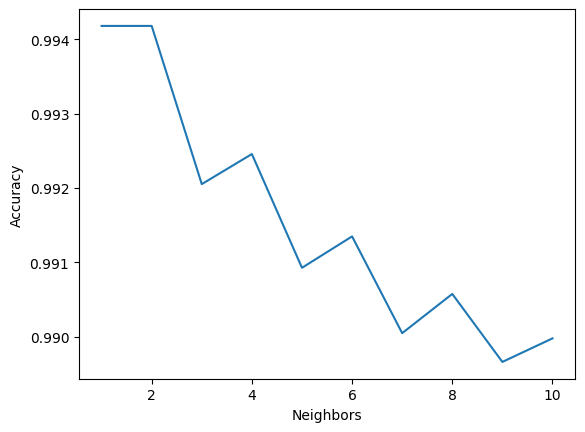

[0.9941789916114169, 0.9941789916114169, 0.9920510701158926, 0.9924555510613229, 0.9909255579199128, 0.9913476249934052, 0.9900462515168036, 0.990573835358669, 0.9896593566994355, 0.9899759070045548]


In [28]:
plt.plot(neighbors, accuracy)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()
print(accuracy)

In [29]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9941789916114169
